# PART 1 DEFINE RL ENVIORNMENT by minazmeh and nagasita

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import random

Initial State:


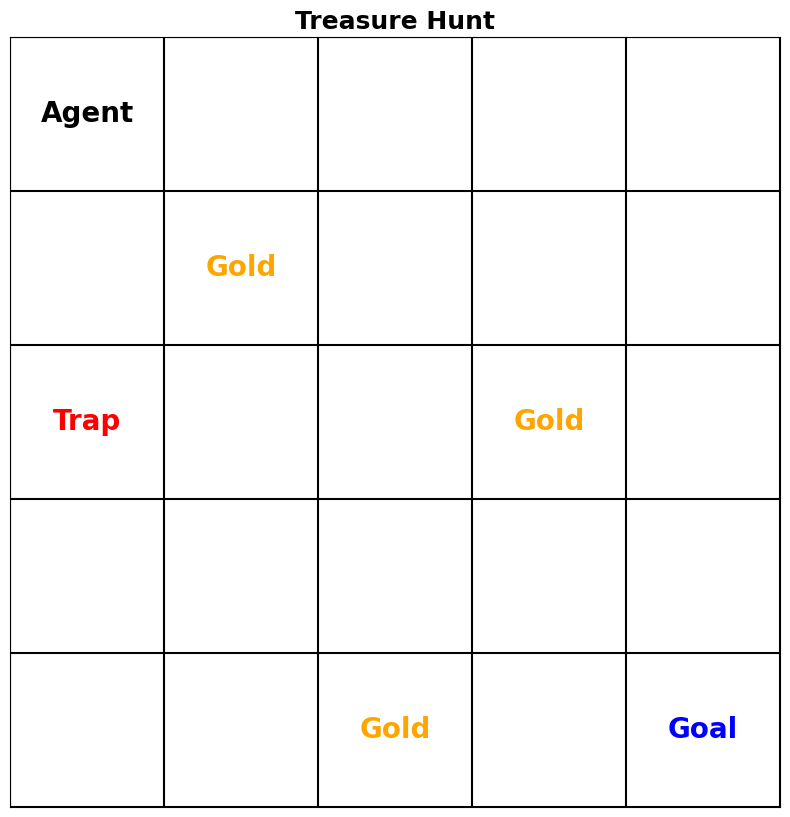

In [10]:
class TreasureHuntEnv:
    def __init__(self):
        self.action_space = ['Up', 'Down', 'Left', 'Right']
        self.state_space = [(x, y) for x in range(5) for y in range(5)]
        self.rewards = {
            (1, 1): 1,# Treasure 1 worth 1
            (4, 2): 3,# Treasure 2 worth 3
            (2, 3): 1, # Treasure 3 worth 1
            (2, 0): -1,# Trap penalty of -1
            (4, 4): 50 # Safehouse (goal)
        }
        self.current_state = (0, 0)# Starting state

    def step(self, action):
        x, y = self.current_state
        if action == 'Up':
            x = max(0, x - 1)
        elif action == 'Down':
            x = min(4, x + 1)
        elif action == 'Left':
            y = max(0, y - 1)
        elif action == 'Right':
            y = min(4, y + 1)

        self.current_state = (x, y)
        reward = self.rewards.get(self.current_state, 0) 
        done = self.current_state == (4, 4)
        return self.current_state, reward, done

    def reset(self):
        self.current_state = (0, 0)
        return self.current_state
    
    def render(self):
        grid = np.zeros((5, 5)) 
        x, y = self.current_state 

        plt.figure(figsize=(10, 10))  
        for i in range(5):
            for j in range(5):
                if (i, j) == (4, 4):  
                    if (i, j) == self.current_state:
                        continue
                    plt.text(j + 0.5, 4 - i + 0.5, "Goal", ha='center', va='center',
                             color="blue", fontsize=20, fontweight='bold')
                    
                elif (i, j) in self.rewards: 
                    if (i, j) == self.current_state: 
                        # We will not do the rendering text here because it will be overridden by the agent when the backgroound becomes black for the cell
                        continue
                    if self.rewards[(i, j)] > 0:  # Treasure is > 0 ... 10 
                        plt.text(j + 0.5, 4 - i + 0.5, "Gold", ha='center', va='center',
                                 color="orange", fontsize=20, fontweight='bold')
                    elif self.rewards[(i, j)] < 0:  # Trap < 0 
                        plt.text(j + 0.5, 4 - i + 0.5, "Trap", ha='center', va='center',
                                 color="red", fontsize=20, fontweight='bold')

        if self.current_state in self.rewards: # if the agent in standing on the reward cells.. we need to change the appreance of the cell based on it.
            if self.rewards[self.current_state] == 50:  
                #on a Goal cell
                agent_color = "blue"
                cell_color = "black"  
            elif self.rewards[self.current_state] > 0:  
                #on a Gold cell
                agent_color = "orange"
                cell_color = "black"  
            elif self.rewards[self.current_state] < 0:  
                #on a Trap cell
                agent_color = "red"
                cell_color = "black"
        else:
            agent_color = "black"  
            cell_color = None
            # cell_color = " --> maybe keep it green.. later to decide.

        if cell_color:
            plt.gca().add_patch(plt.Rectangle((y, 4 - x), 1, 1, color=cell_color))

        plt.text(y + 0.5, 4 - x + 0.5, "Agent", ha='center', va='center',
                 color=agent_color, fontsize=20, fontweight='bold')

        for i in range(6):
            plt.axhline(i, color='black', linewidth=1.5)
            plt.axvline(i, color='black', linewidth=1.5)

        plt.xlim(0, 5)
        plt.ylim(0, 5)

        plt.gca().set_aspect('equal', adjustable='box') 
        plt.gca().set_xticks([]) 
        plt.gca().set_yticks([])
        plt.title("Treasure Hunt", fontsize=18, fontweight='bold')
        plt.show()




#RL simulation
env = TreasureHuntEnv()
state = env.reset()
print("Initial State:")
env.render()



Step 1:
Action: Left
Next State: (0, 0)
Reward: 0


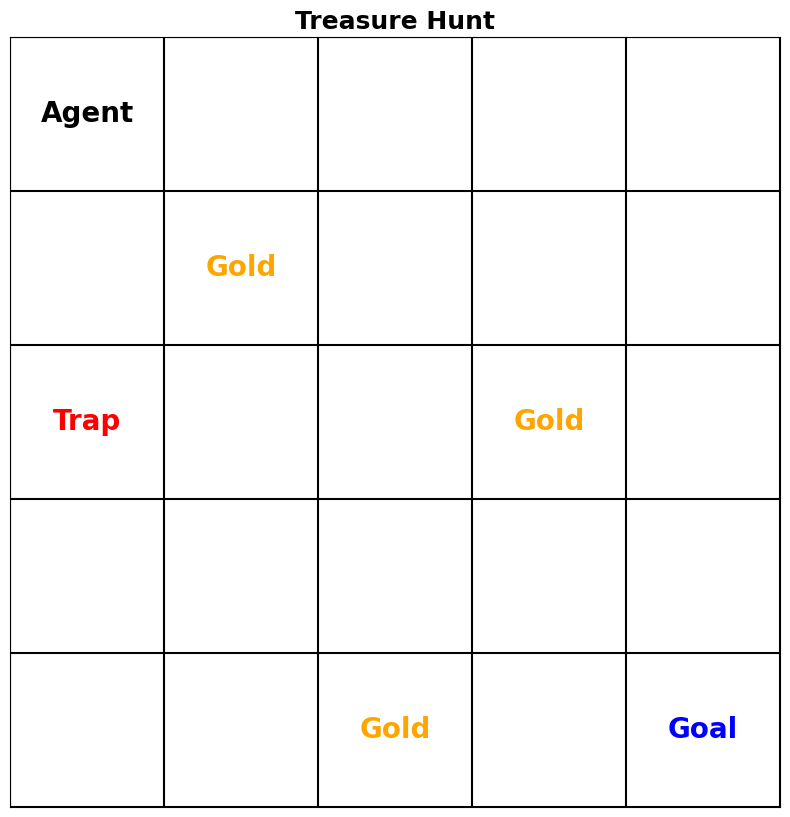

Step 2:
Action: Up
Next State: (0, 0)
Reward: 0


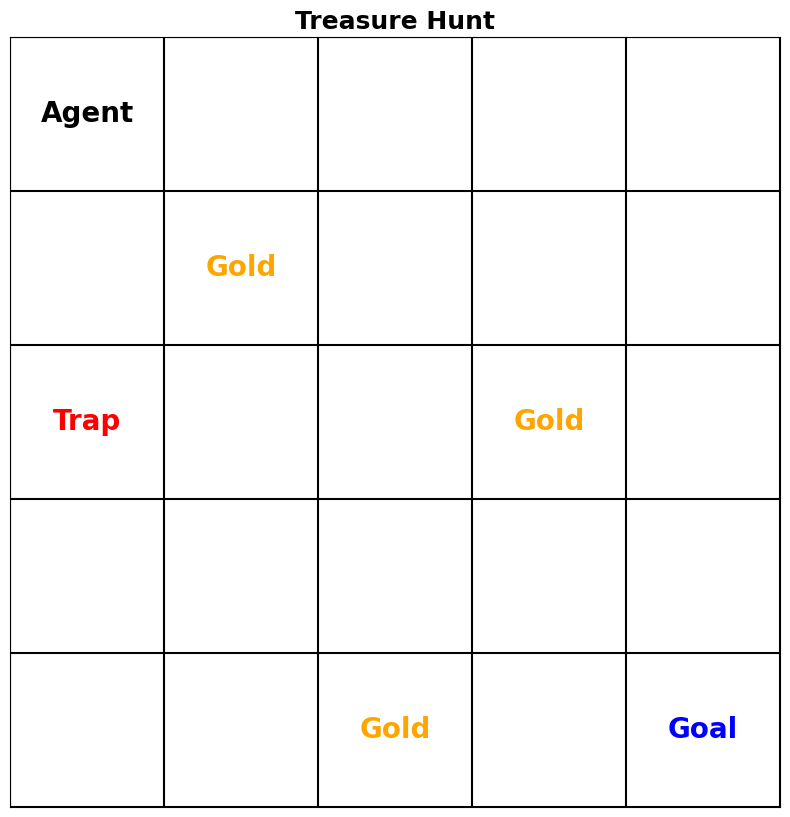

Step 3:
Action: Left
Next State: (0, 0)
Reward: 0


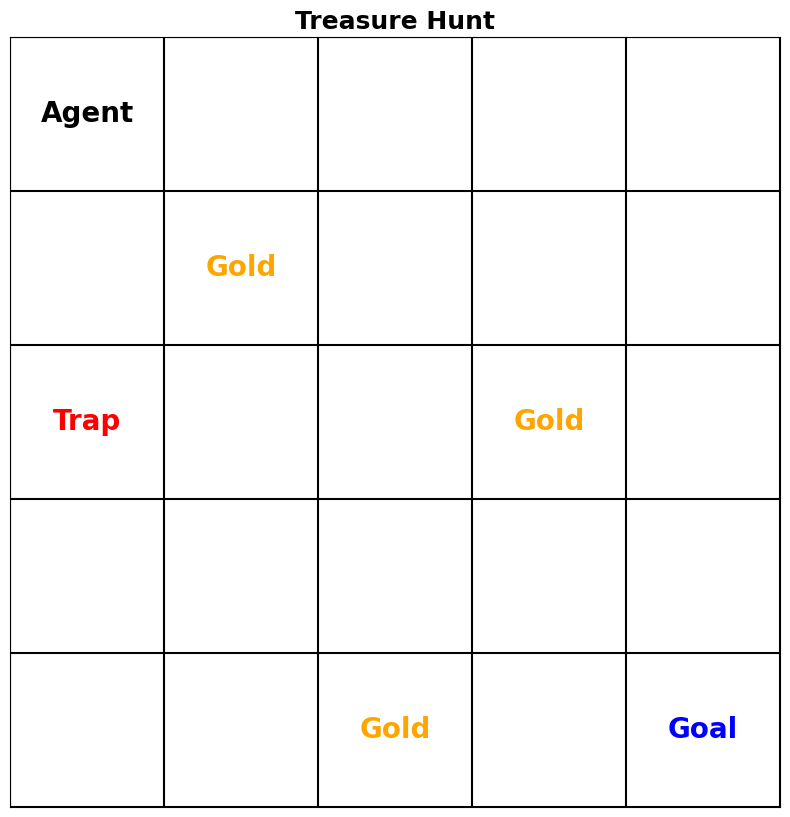

Step 4:
Action: Down
Next State: (1, 0)
Reward: 0


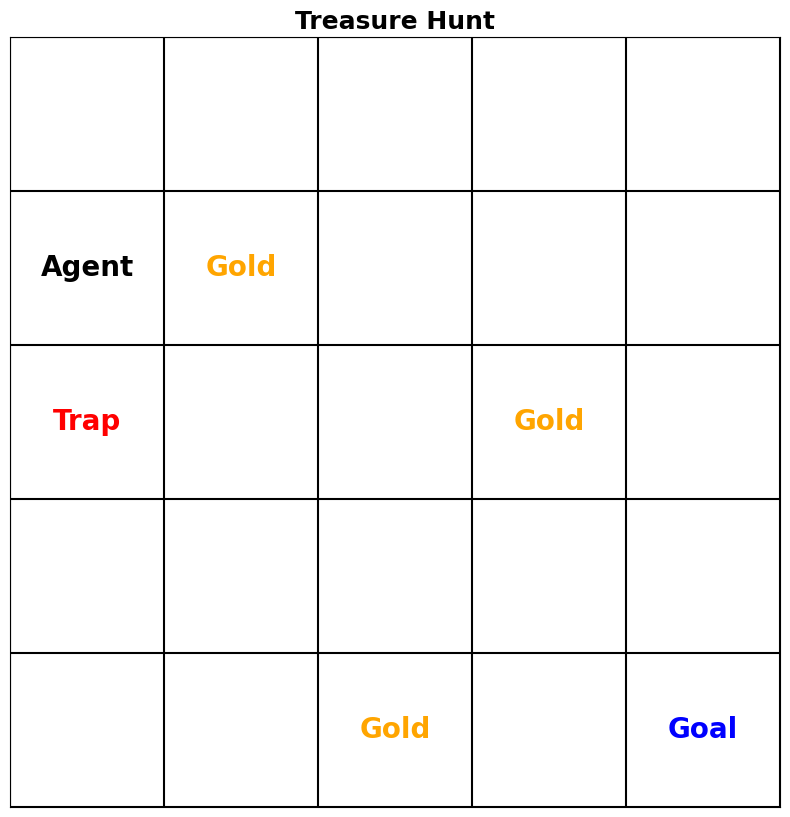

Step 5:
Action: Right
Next State: (1, 1)
Reward: 1


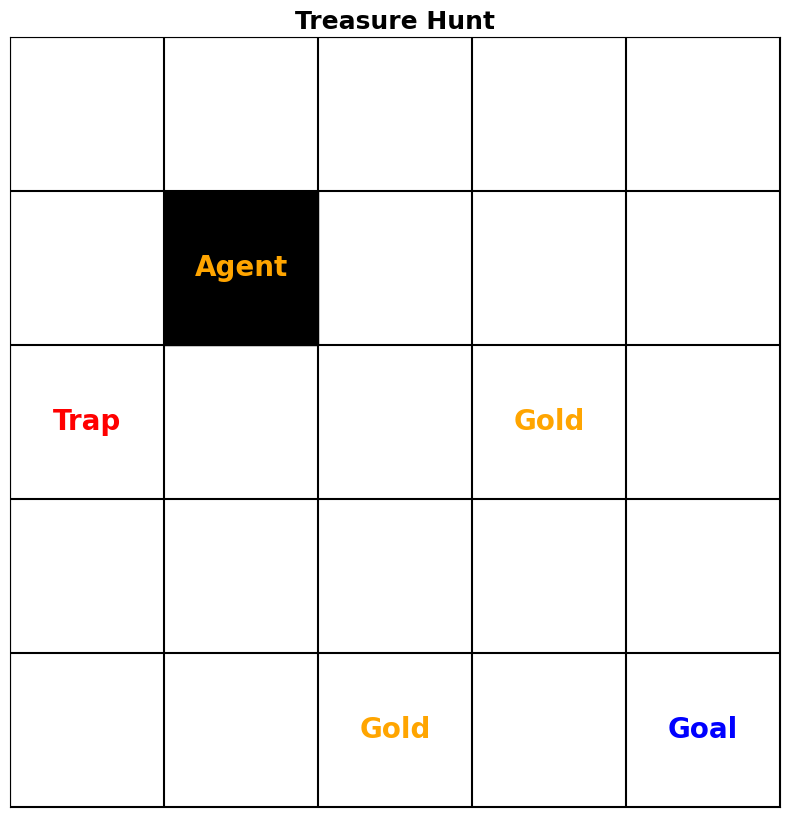

Step 6:
Action: Down
Next State: (2, 1)
Reward: 0


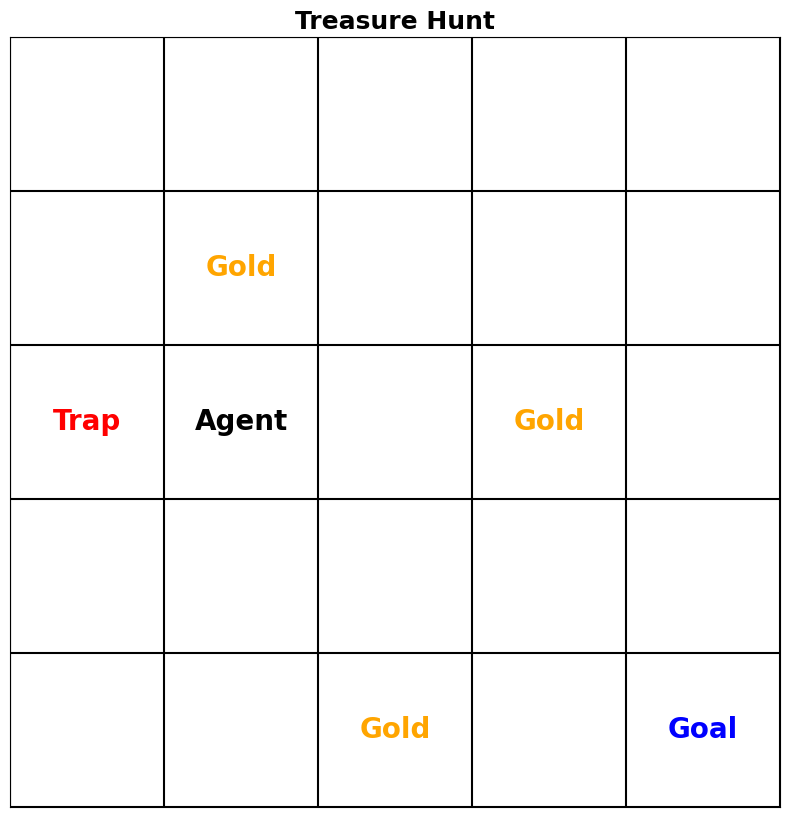

Step 7:
Action: Left
Next State: (2, 0)
Reward: -1


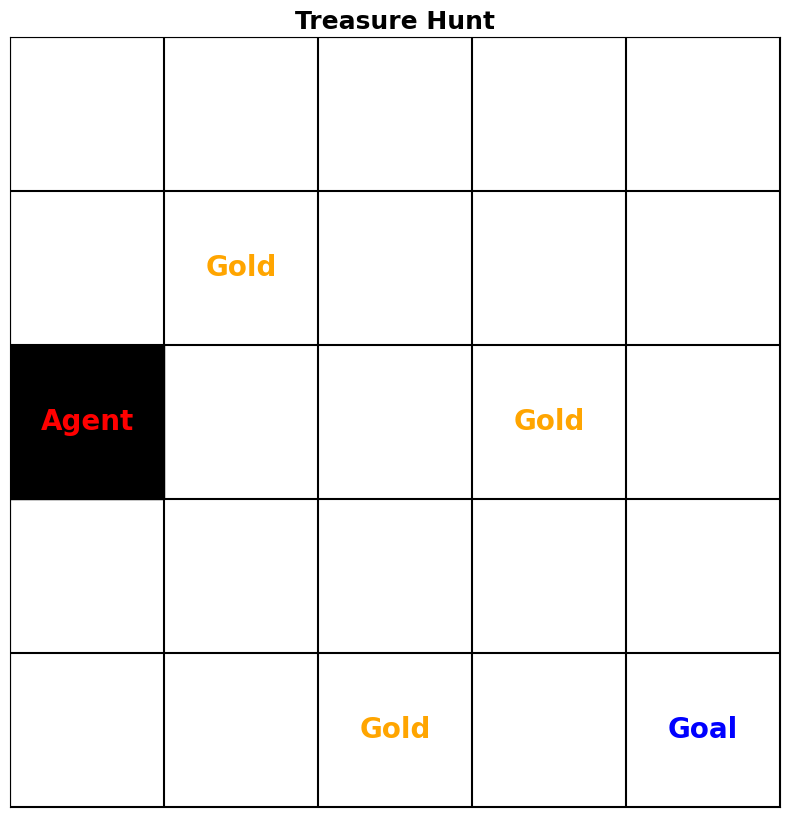

Step 8:
Action: Down
Next State: (3, 0)
Reward: 0


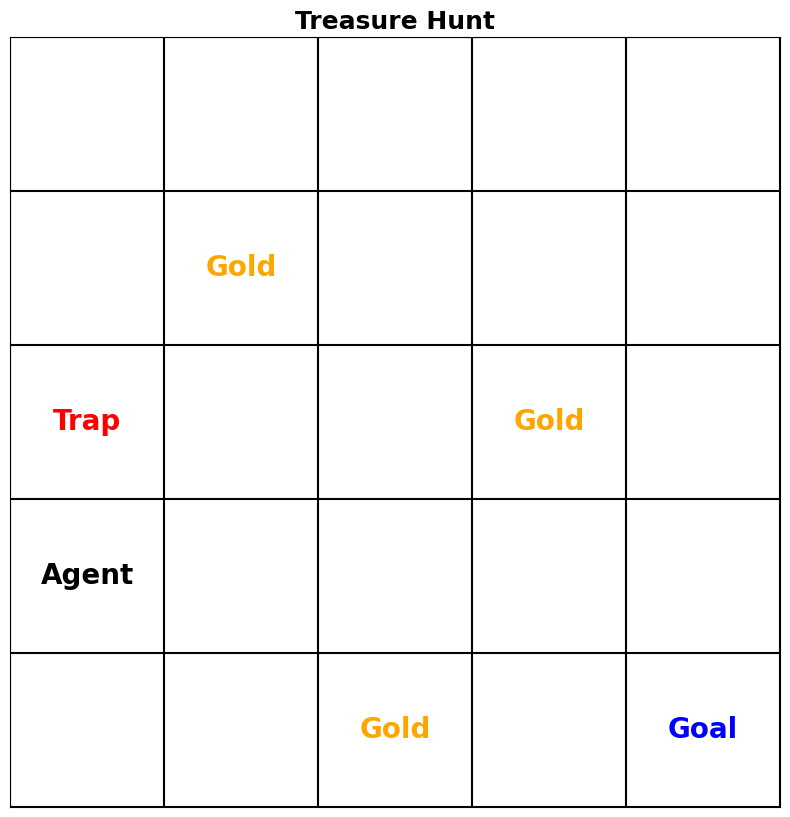

Step 9:
Action: Up
Next State: (2, 0)
Reward: -1


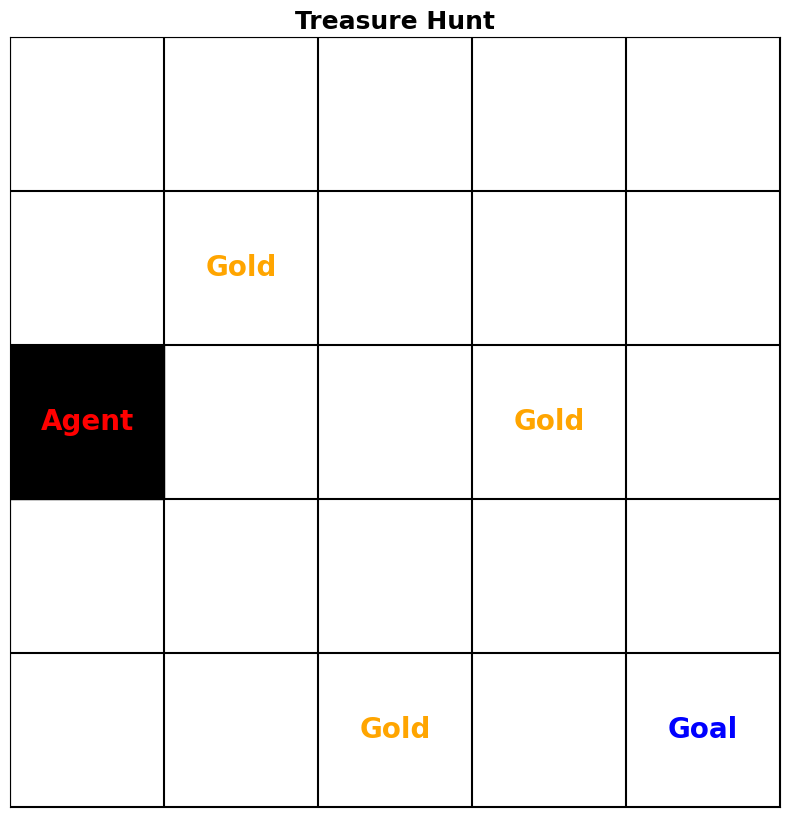

Step 10:
Action: Down
Next State: (3, 0)
Reward: 0


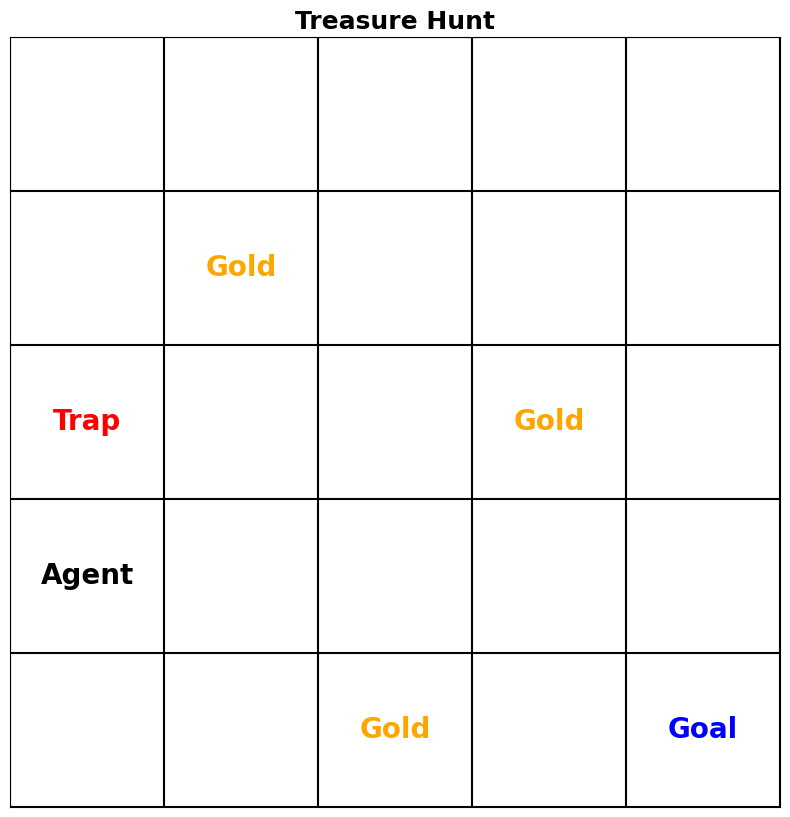

In [11]:
for t in range(10):
    action = random.choice(env.action_space)
    next_state, reward, done = env.step(action)
    print(f"Step {t+1}:")
    print(f"Action: {action}")
    print(f"Next State: {next_state}")
    print(f"Reward: {reward}")
    env.render()
    if done:
        print("Reached the goal!")
        break

# Refrences

https://www.restack.io/p/reinforcement-learning-answer-gridworld-example-python-cat-ai

https://ubuffalo-my.sharepoint.com/personal/avereshc_buffalo_edu/_layouts/15/onedrive.aspx?ga=1&id=%2Fpersonal%2Favereshc%5Fbuffalo%5Fedu%2FDocuments%2F2024%5FFall%5FRL%2F%5Fpublic%2FCourse%20Materials%2FRL%20Environment%20Demo

https://www.supplychaindataanalytics.com/visualizing-2d-grids-and-arrays-using-matplotlib-in-python/

https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Rectangle.html

https://www.geeksforgeeks.org/matplotlib-pyplot-gca-in-python/

https://www.geeksforgeeks.org/sarsa-reinforcement-learning/

https://www.javatpoint.com/sarsa-reinforcement-learning

https://advancedoracademy.medium.com/what-is-sarsa-an-introduction-8f495daf2418

https://www.youtube.com/watch?v=FhSaHuC0u2M&t=1s

https://builtin.com/machine-learning/sarsa
